In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from webencodings import labels

In [108]:
df1=pd.read_excel("FiqureWHR2023.xls")
df2=pd.read_excel("TableWHR2023.xls",index_col=0)

In [109]:
df2_grouped=df2.groupby([df2.index, "year"])["Life Ladder"].mean()
df2_grouped = df2_grouped.reset_index()
indexes = df2_grouped['Country name'].unique()
df2_grouped[:100:10]

,Country name,year,Life Ladder
0,Afghanistan,2008,3.723590
10,Afghanistan,2018,2.694303
20,Albania,2014,4.813763
30,Algeria,2011,5.317194
40,Angola,2012,4.360250
50,Argentina,2013,6.582260
60,Armenia,2006,4.289311
70,Armenia,2016,4.325472
80,Australia,2011,7.405616
90,Australia,2021,7.111599


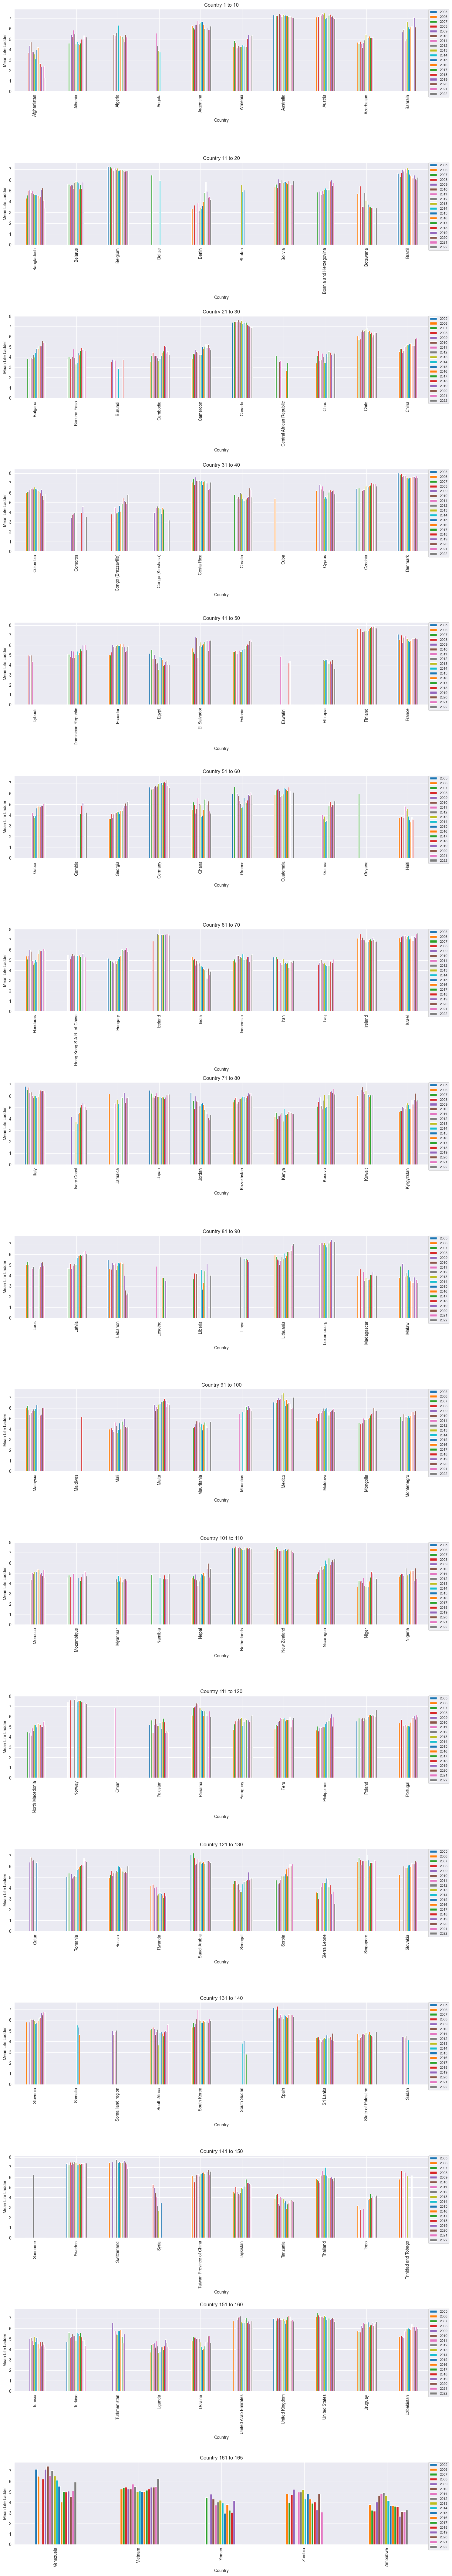

In [110]:
per_plot=10
num_plots = int(np.ceil(len(indexes) / per_plot))

fig, axes = plt.subplots(num_plots, 1, figsize=(15, 5*num_plots))

for i, ax in enumerate(axes):
    selected_indexes = indexes[i*per_plot:(i+1)*per_plot]

    df_selected = df2_grouped[df2_grouped['Country name'].isin(selected_indexes)]

    df_selected.groupby(['Country name', 'year'])['Life Ladder'].mean().unstack().plot(kind='bar', ax=ax)
    
    ax.set_title(f'Country {i*per_plot+1} to {min((i+1)*per_plot, len(indexes))}')

    ax.set_xlabel('Country')

    ax.set_ylabel('Mean Life Ladder')
    ax.legend(fontsize='small', bbox_to_anchor=( 1 , 1 ), loc='upper left',ncol=1, borderaxespad=0.)

plt.tight_layout()
plt.show()

In [111]:
df1_new = df1[["Ladder score", "Logged GDP per capita", "Social support", "Healthy life expectancy",                                                                       "Freedom to make life choices", "Generosity", "Perceptions of corruption"]]
df1_new

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.8042,10.792010,0.968770,71.149994,0.961408,-0.018824,0.181745
1,7.5864,10.962164,0.954112,71.250145,0.933533,0.134242,0.195814
2,7.5296,10.895531,0.982533,72.050018,0.936349,0.210987,0.667848
3,7.4729,10.638705,0.943344,72.697205,0.808866,-0.023080,0.708094
4,7.4030,10.942279,0.930499,71.550018,0.886875,0.212686,0.378929
...,...,...,...,...,...,...,...
132,3.2072,7.006671,0.651610,55.375000,0.663798,0.085998,0.833752
133,3.2035,7.640998,0.689918,54.049889,0.654055,-0.046230,0.765582
134,3.1376,7.394014,0.555251,54.899853,0.660367,0.104929,0.857780
135,2.3922,9.477677,0.529754,66.148819,0.473900,-0.140915,0.891104


<Axes: >

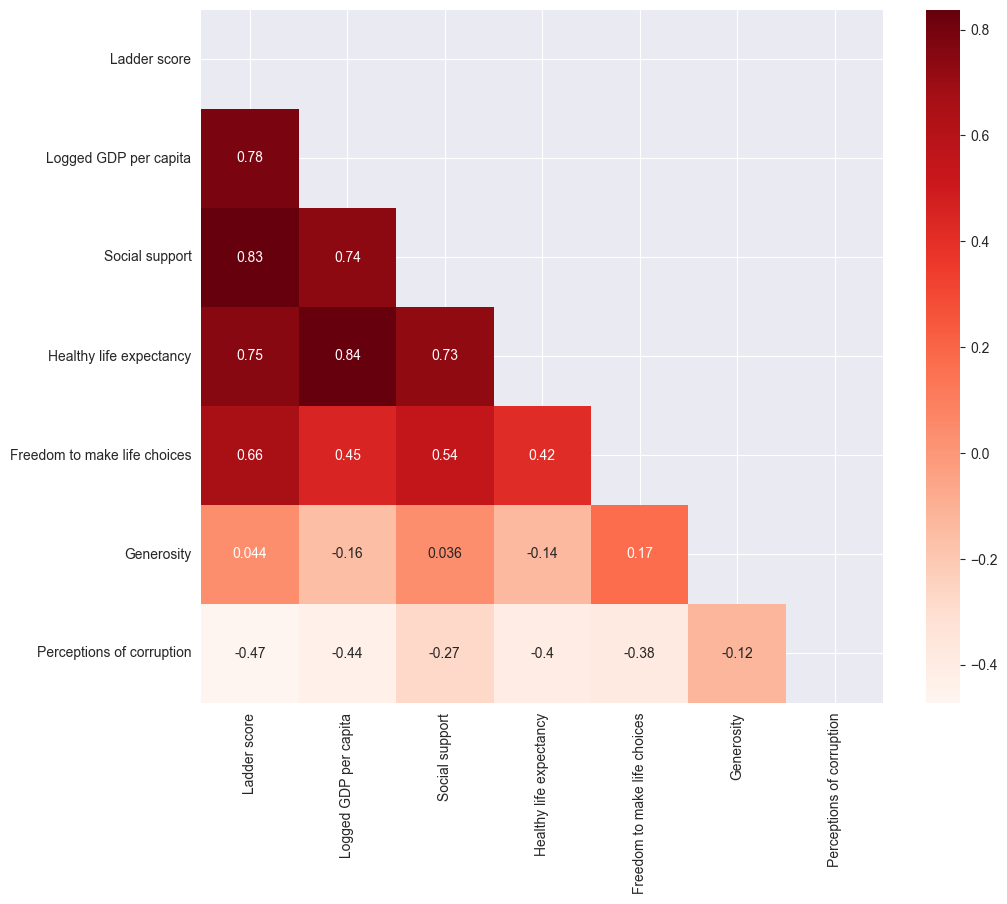

In [112]:
corr = df1_new.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap="Reds",annot=True)

In [113]:
by_columns=[df1.columns[1]]+list(df1.columns[12:18])
by_columns

['Ladder score',
 'Explained by: Log GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption']

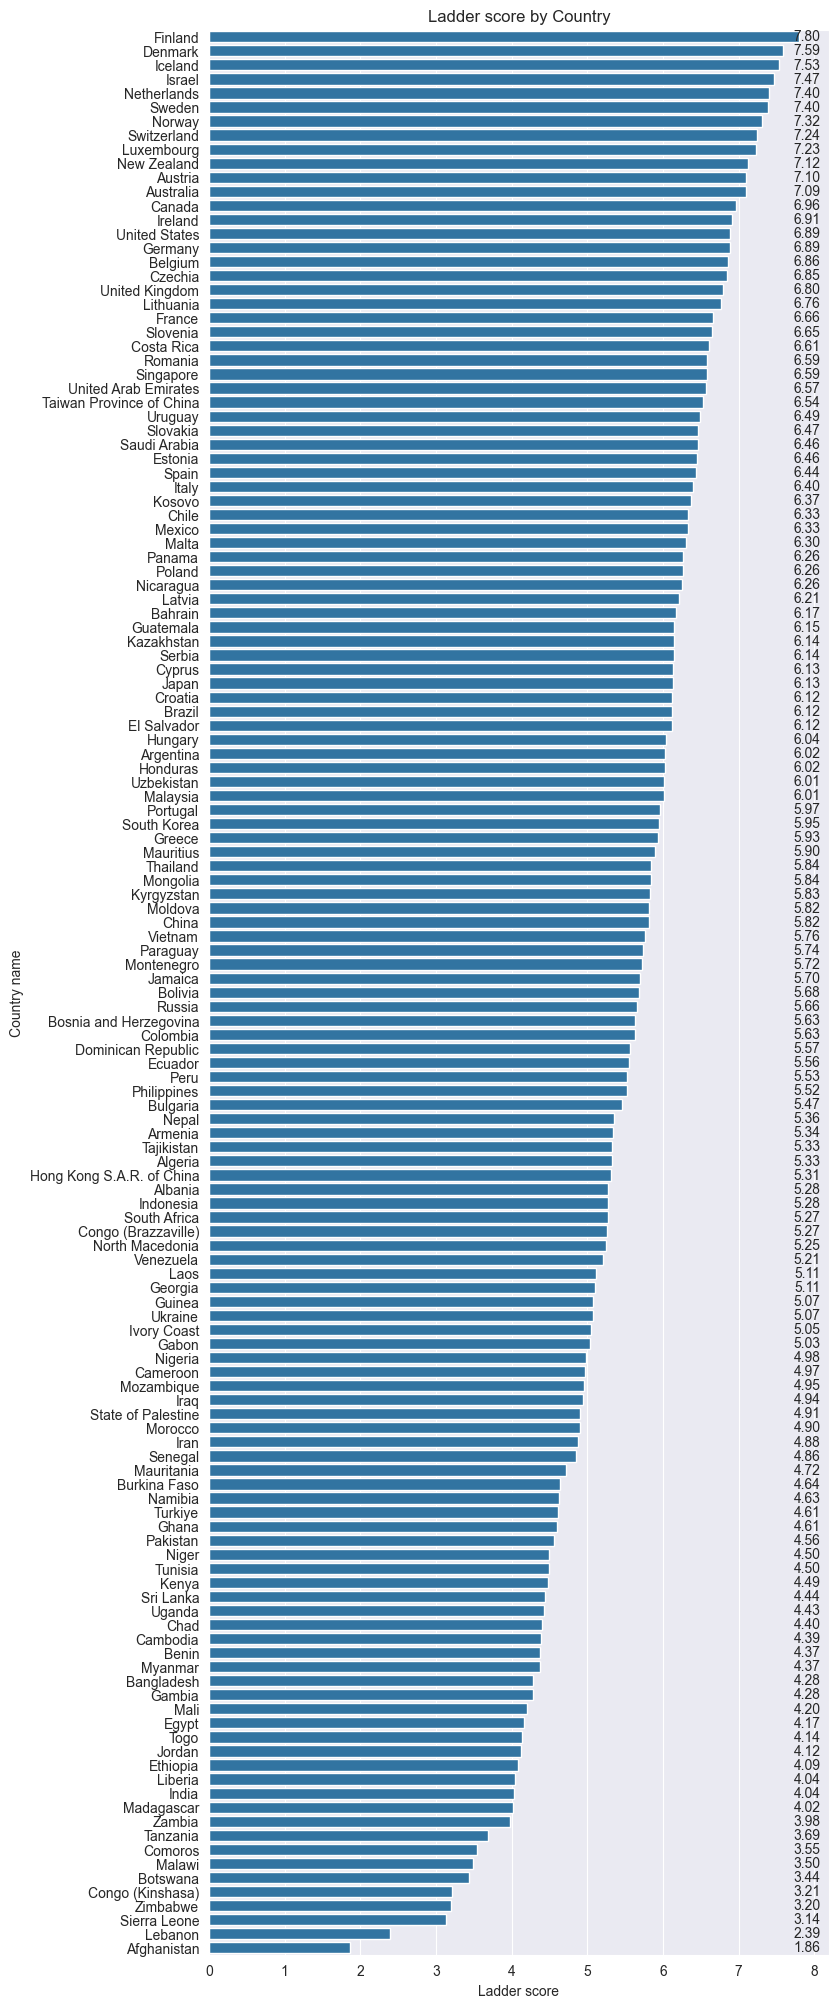

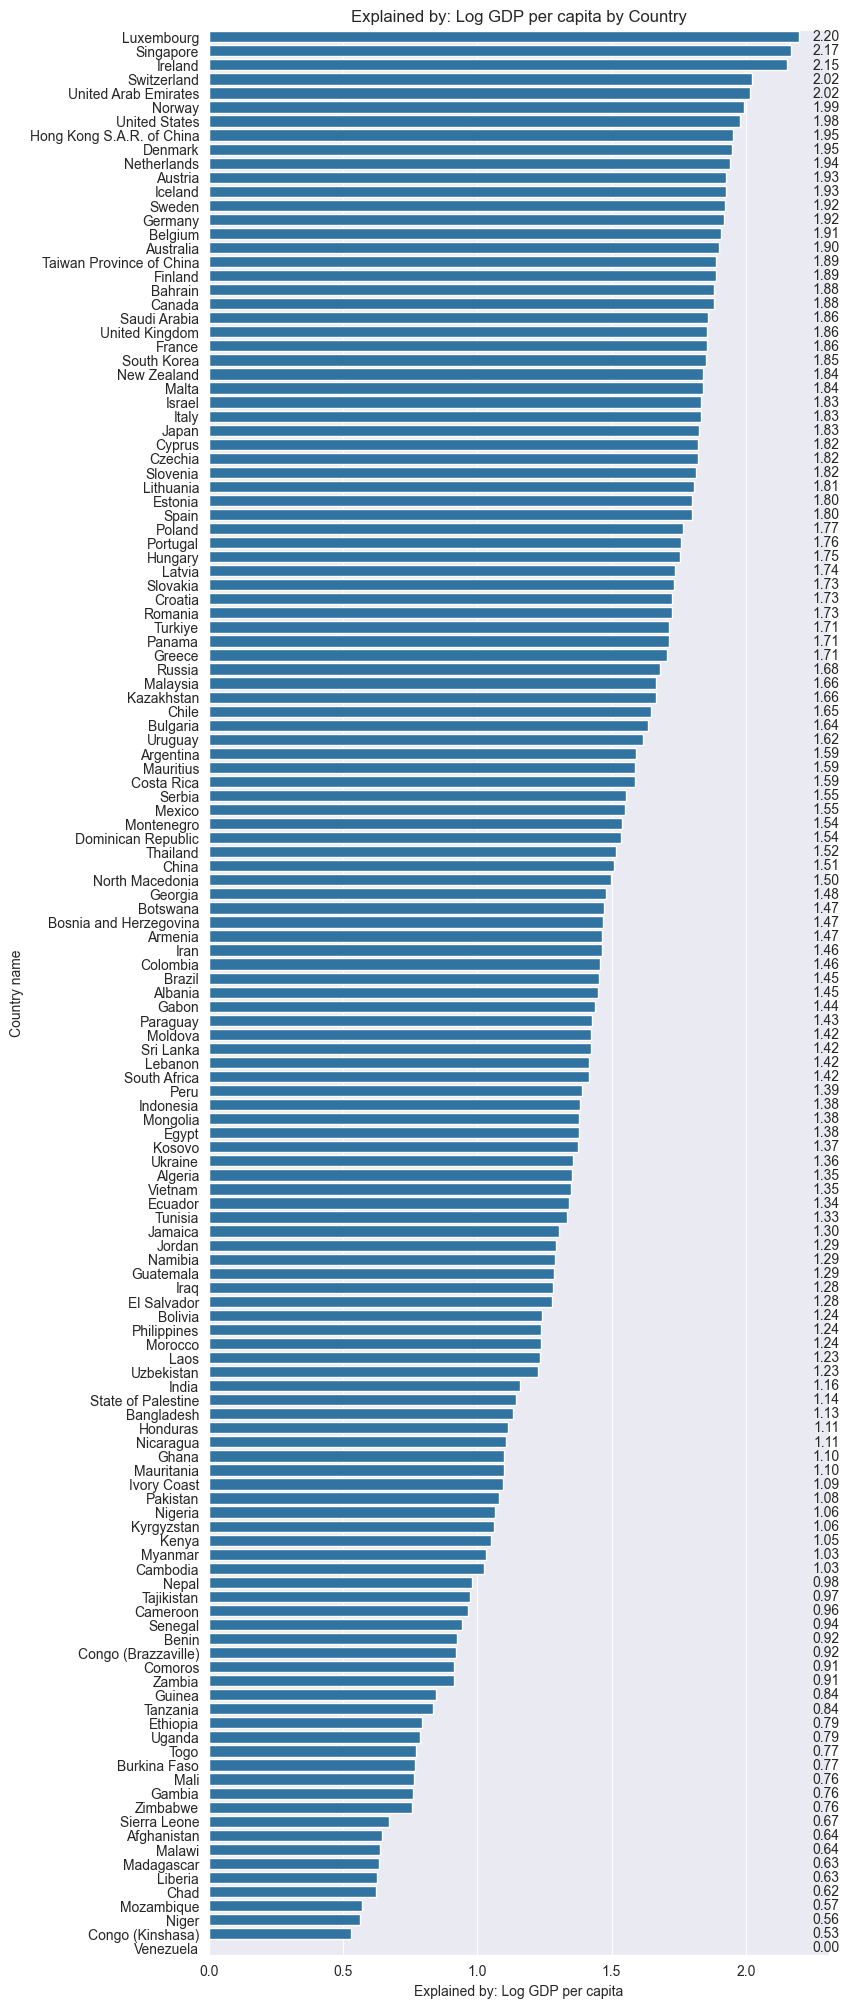

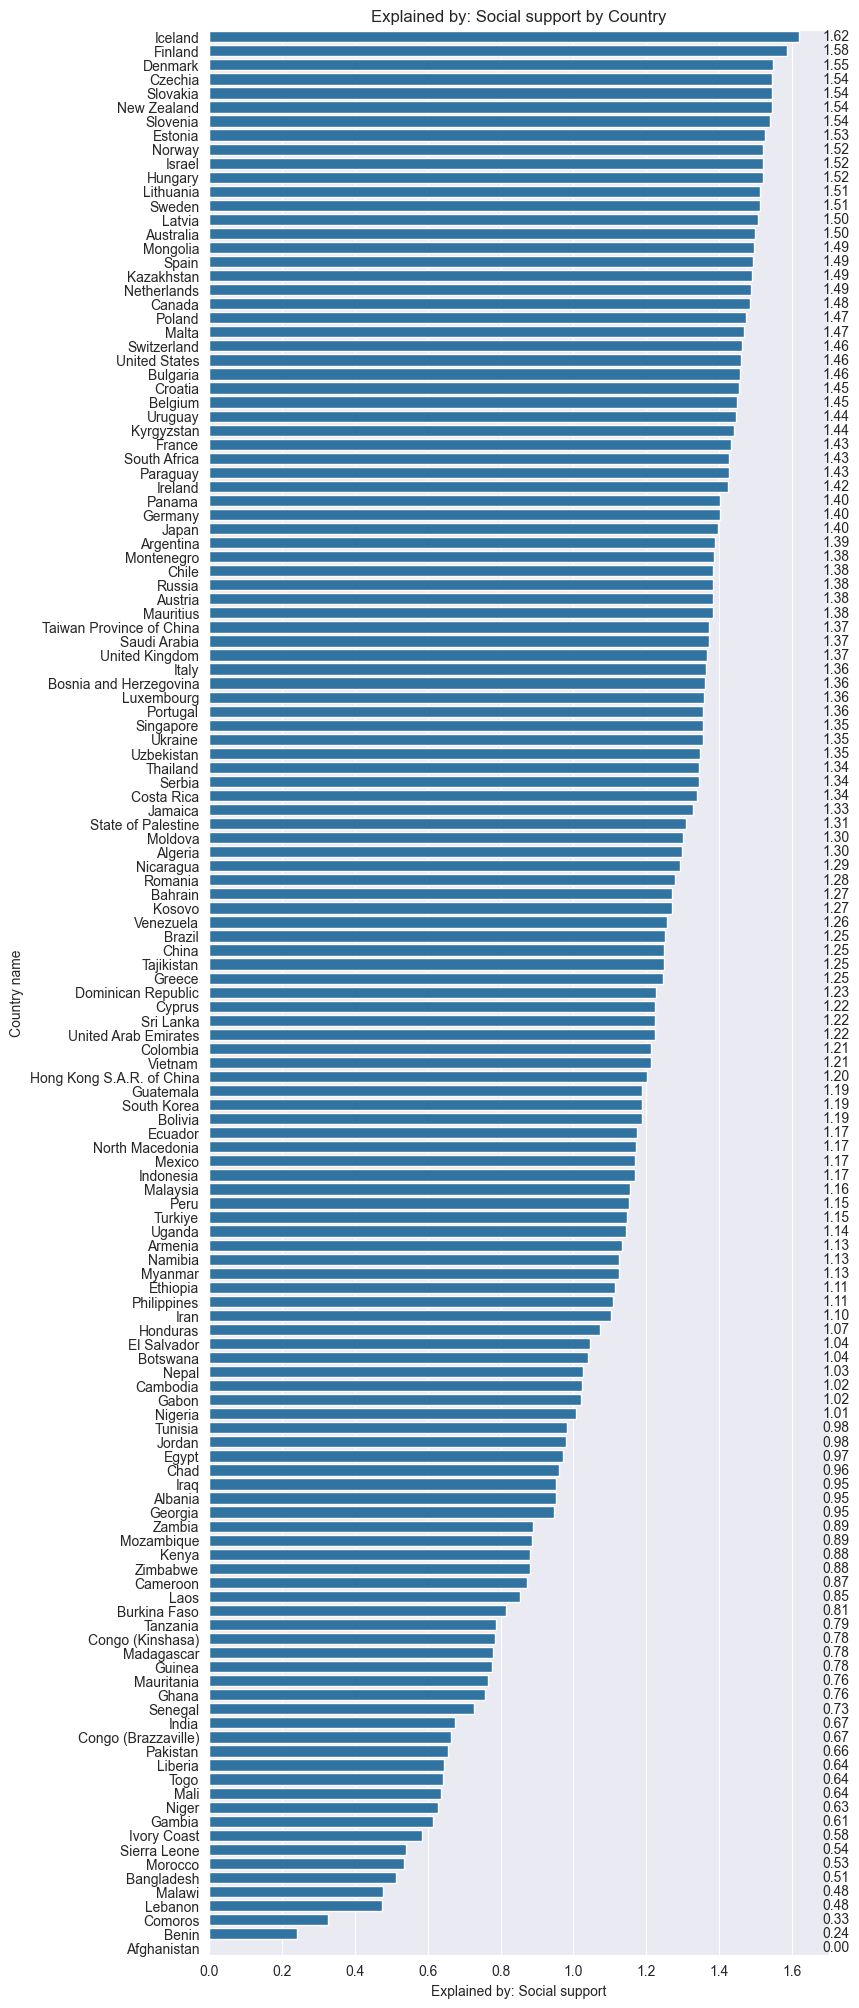

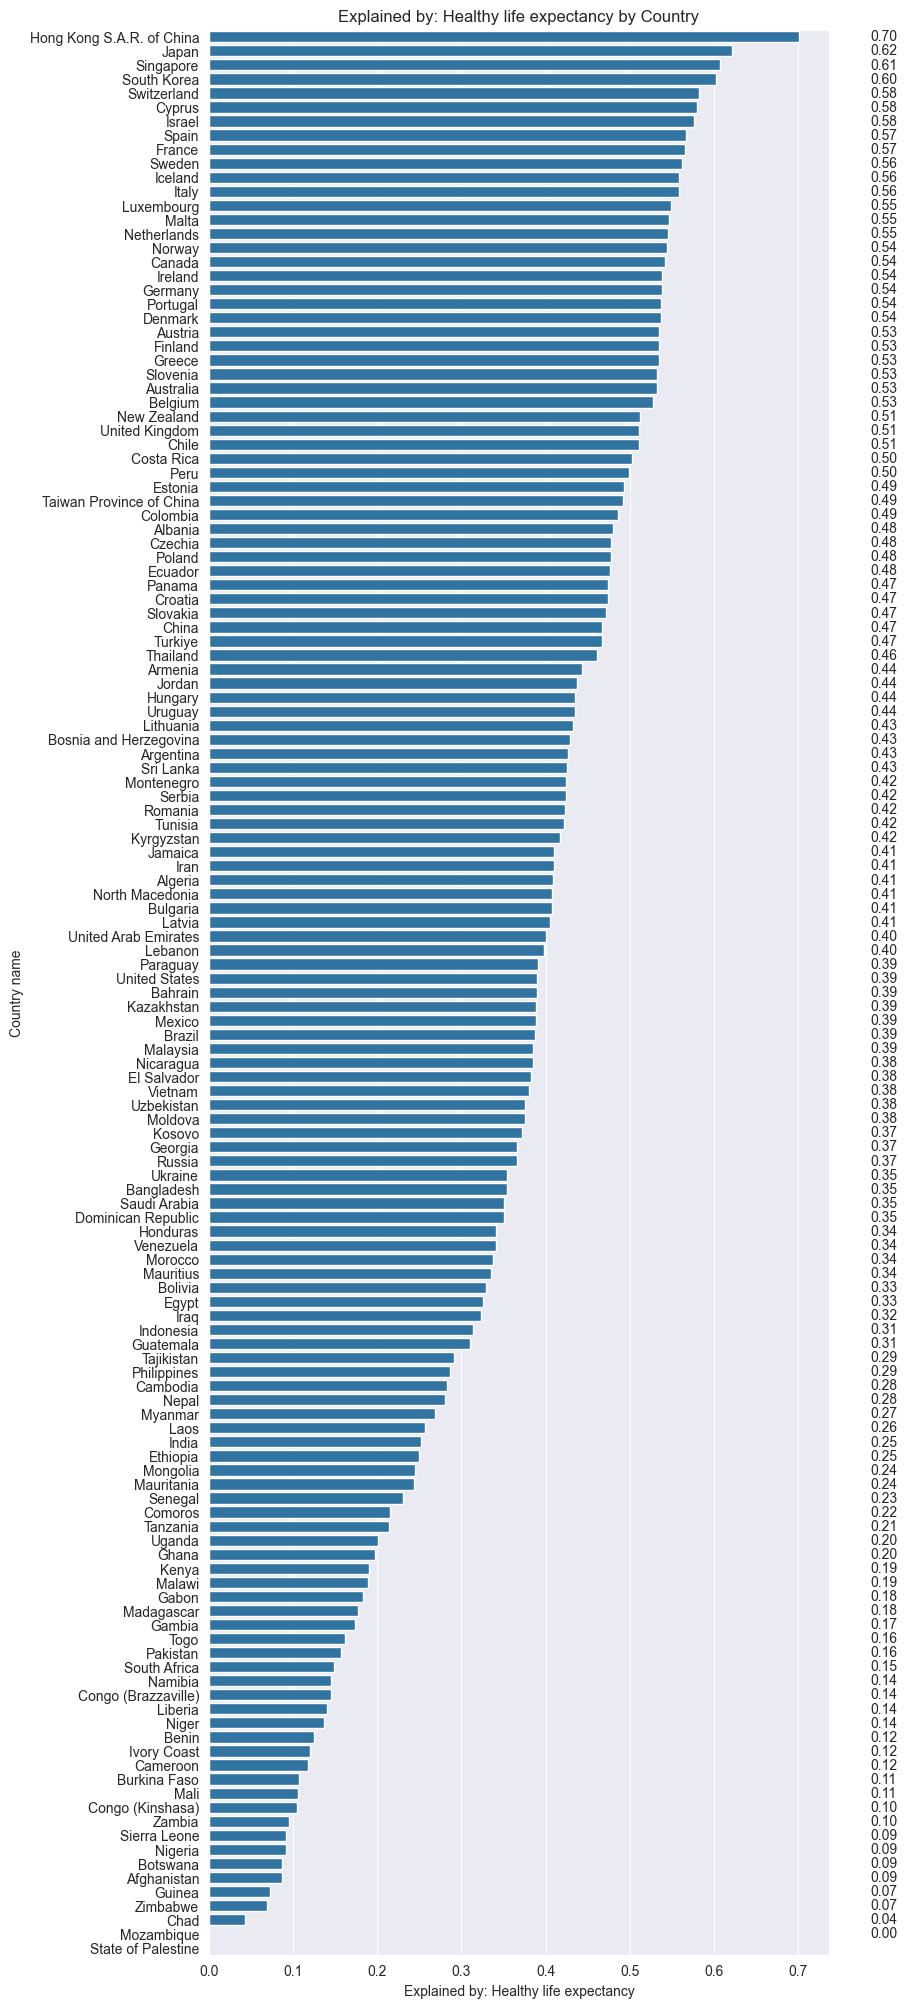

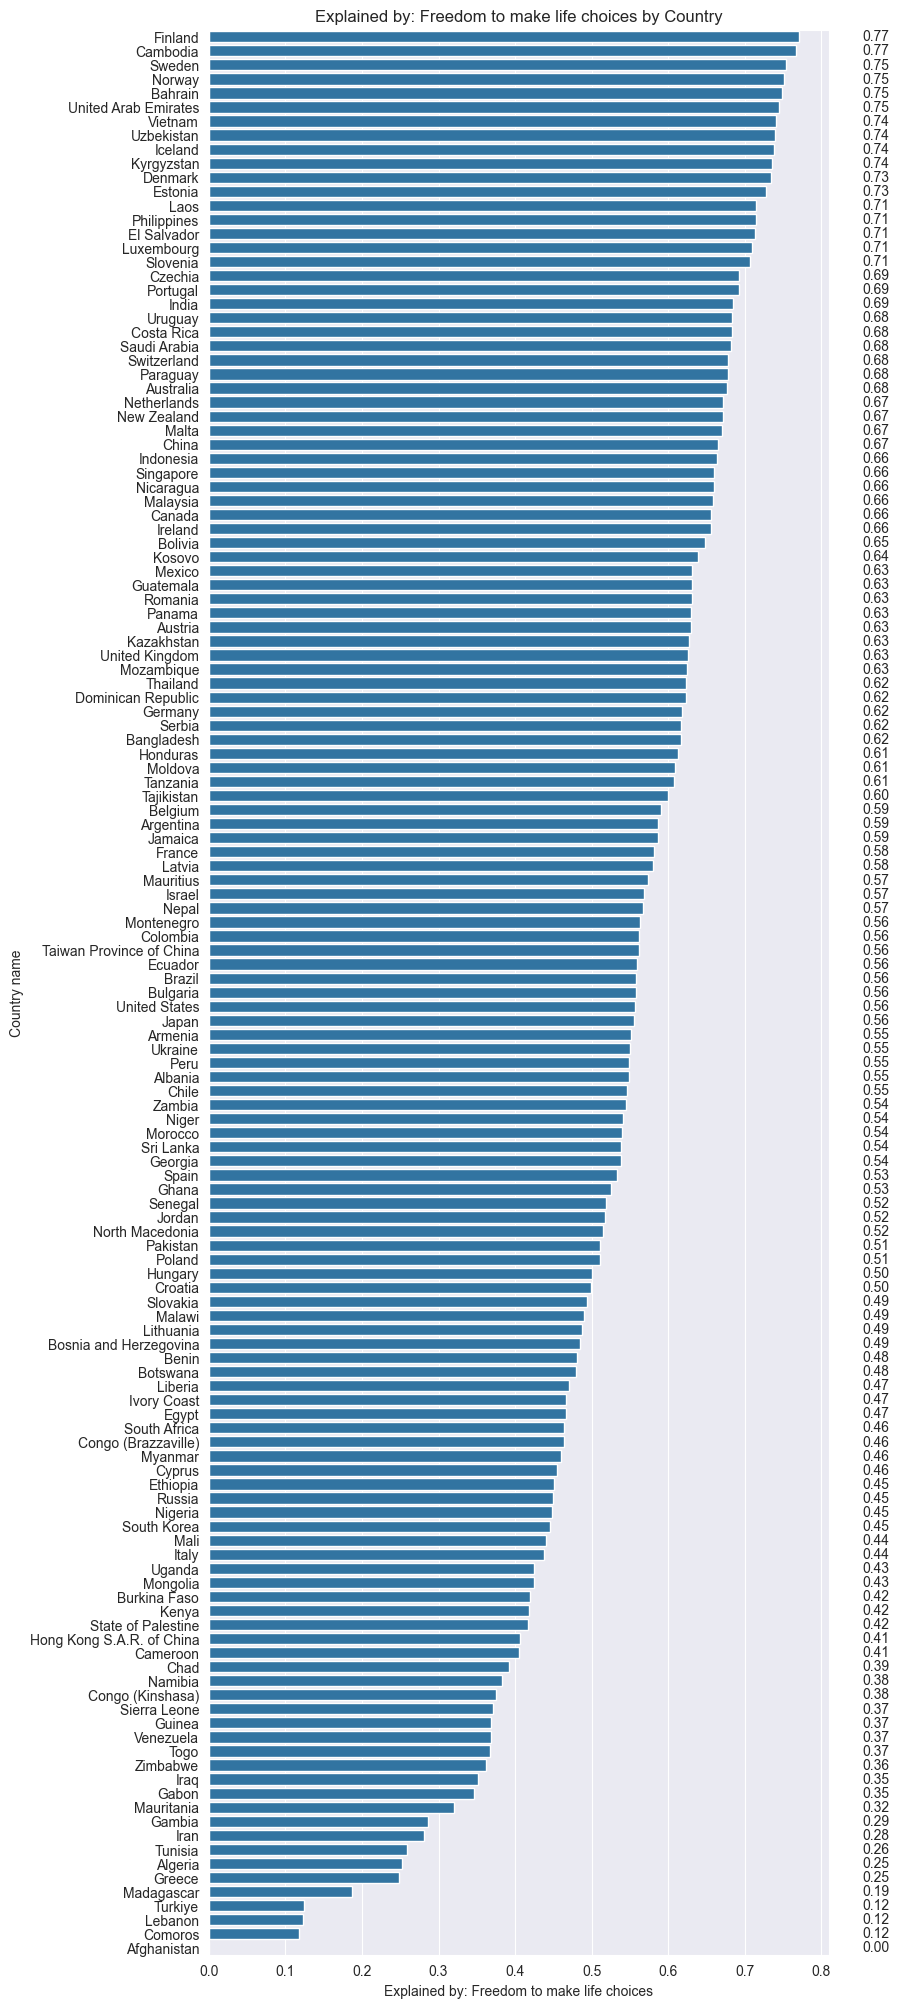

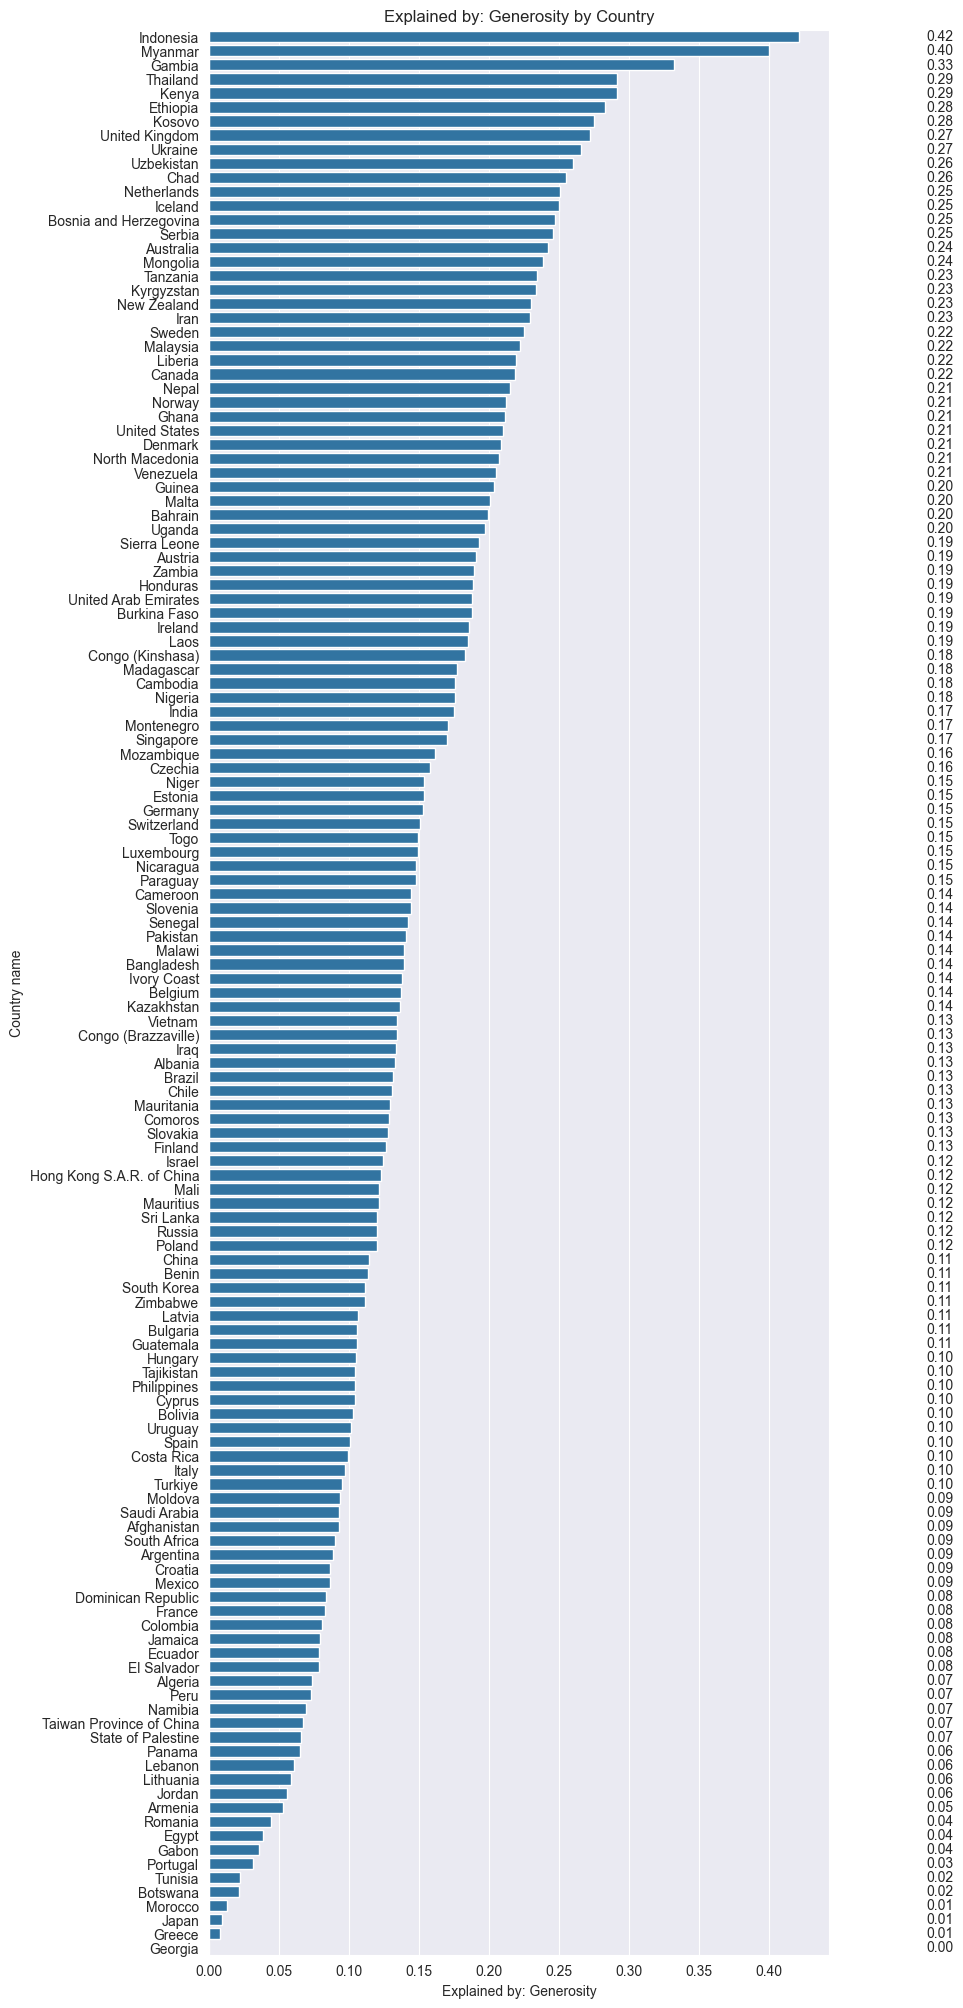

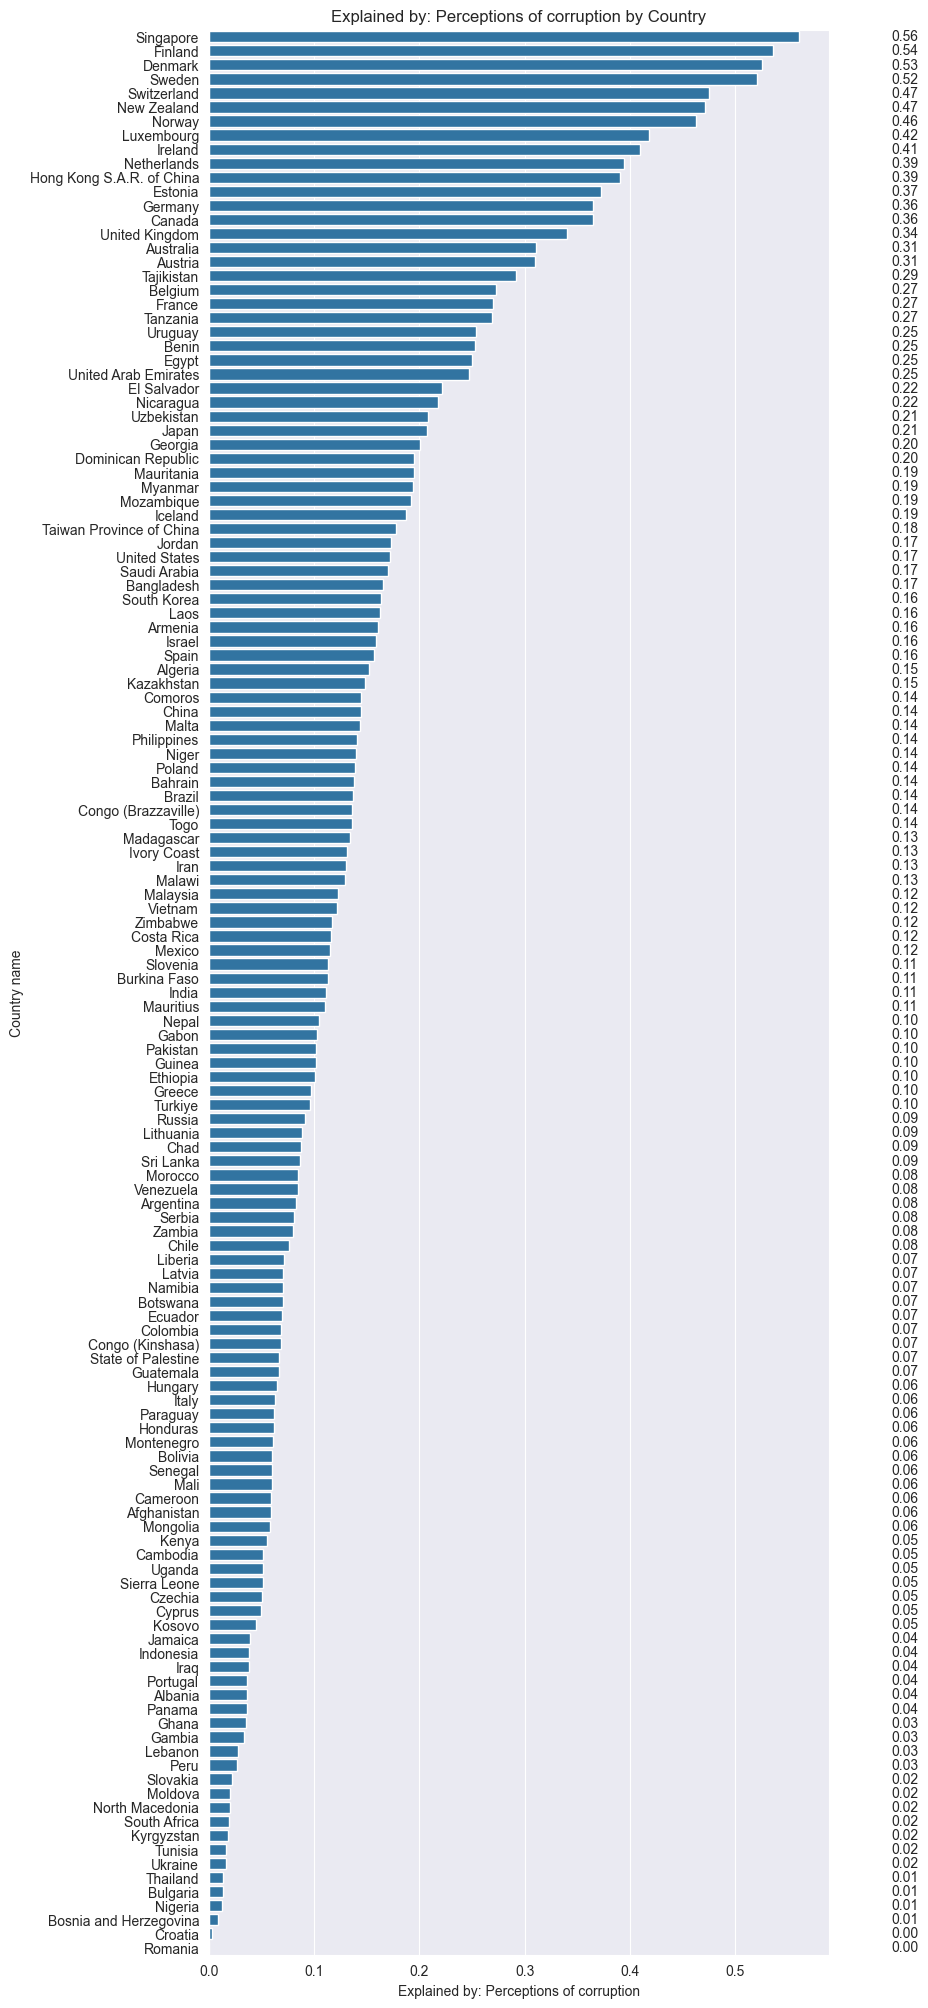

In [114]:
for i in by_columns:
    fig,ax= plt.subplots(figsize=(8,25))
    barplot = sns.barplot(x=i, y='Country name', data=df1.sort_values(by=i, ascending=False), ax=ax)
    ax.set_title(f'{i} by Country')
    max=barplot.patches[0].get_width()
    for p in barplot.patches:
        width = p.get_width()
        ax.text(max+0.1,
                p.get_y() + p.get_height() / 2, 
                '{:1.2f}'.format(width),
                ha = 'center',
                va = 'center')
